In [1]:
from graphops.actionspace import AddAtomActionSpace, AddBondActionSpace, SubstituteAtomActionSpace, TerminateActionSpace

max_depth = 5


max_heavy_atoms = max_depth
accepted_atoms = ["C", "O", "N", "F", "S", "Cl"]
accepted_substitutions = {
    "C": ["O", "N", "F", "S", "Cl"],
    "O": ["C", "N", "F", "S", "Cl"],
    "N": ["C", "O", "F", "S", "Cl"],
    "F": ["C", "O", "N", "S", "Cl"],
    "S": ["C", "O", "N", "F", "Cl"],
    "Cl": ["C", "O", "N", "F", "S"],
}
action_spaces = [
    AddAtomActionSpace(keep_connected=True), 
    AddBondActionSpace(),
    SubstituteAtomActionSpace()]

figures_prefix = "/home/jleguy/Documents/these/prod/figures/01_space_enumeration/02_test_tabu/"



### Computing times and n_smiles for explorations of depths in range 1, max_depth

In [4]:
from graphops.molgraph import QuMolGraphBuilder
from graphops.actionspace import ActionSpace
from graphops.spaceexploration import explore, plot_exploration_tree, plot_neighborhood, expl_tree_to_smiles_list
from time import time

def run_search(depth, tabu):
    
    
    # Loading parameters
    parameters = ActionSpace.ActionSpaceParameters(max_heavy_atoms=max_heavy_atoms,
                                                   accepted_atoms=accepted_atoms,
                                                   accepted_substitutions=accepted_substitutions)
    # Molecular graph builder initialization
    qumol_builder = QuMolGraphBuilder(actionspace_parameters=parameters,
                                      action_spaces=action_spaces,
                                      qumol_graph=None)

    # Performing exploration and retrieving the results in the exploration_tree variable
    # The depth parameter defines the maximum number of action that can be applied on the initial molecule
    # The exploration_factor defines the proportion of valid actions that are randomly selected and applied at each
    # node of the exploration tree
    exploration_tree, root_id = explore(qumol_builder=qumol_builder,
                                        depth=depth,
                                        record_images=False,
                                        tabu=tabu)
    
    return exploration_tree, root_id
    
def from_empty(max_depth, tabu):

    time_list = []
    n_smiles = []
    n_unique_smiles = []

    
    for curr_max_depth in range(1, max_depth+1):
        
        print("Max depth : "+str(curr_max_depth))
    
        # Search
        init_time = time()
        exploration_tree, root_id = run_search(curr_max_depth, tabu=tabu)
        time_list.append(time() - init_time)
        
        # Extracting smiles lists
        smiles_list = expl_tree_to_smiles_list(exploration_tree, unique=False)
    
        # Recording n smiles
        n_smiles.append(len(smiles_list))
        n_unique_smiles.append(len(set(smiles_list)))

        
    return time_list, n_smiles, n_unique_smiles

In [5]:
time_normal, n_smiles_normal, n_unique_smiles = from_empty(max_depth, tabu=False)
time_tabu, n_smiles_tabu, n_unique_smiles_t = from_empty(max_depth, tabu=True)

# Sanity check
if len(n_unique_smiles) != len(n_unique_smiles_t):
    print("TABU SEARCH ERROR")
    exit(1)

Max depth : 1
Max depth : 2
Max depth : 3
Max depth : 4
Max depth : 5
Max depth : 1
Max depth : 2
Max depth : 3
Max depth : 4
Max depth : 5


### Plotting results 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from os import makedirs
from os.path import dirname

def plot_times(time_normal, time_tabu, output_file):

    plt.plot(np.arange(1, len(time_normal)+1), time_normal)
    plt.plot(np.arange(1, len(time_normal)+1), time_tabu)
    plt.legend(["Normal search", "Tabu search"])

    plt.xlabel("Search depth")
    plt.ylabel("Execution time (s)")
    
    # Creating directories if they don't exist
    makedirs(dirname(output_file), exist_ok=True)

    plt.savefig(output_file, dpi=350)
    plt.show()
    
def plot_n_smiles(n_smiles_normal, n_smiles_tabu, n_unique_smiles, output_file):
    
    plt.plot(np.arange(1, len(time_normal)+1), n_smiles_normal)
    plt.plot(np.arange(1, len(time_normal)+1), n_smiles_tabu)
    plt.plot(np.arange(1, len(time_normal)+1), n_unique_smiles)
    plt.legend(["Normal search", "Tabu search", "Unique"])
    
    plt.xlabel("Search depth")
    plt.ylabel("Number of generated SMILES")
    
    # Creating directories if they don't exist
    makedirs(dirname(output_file), exist_ok=True)

    plt.savefig(output_file, dpi=350)
    plt.show()
    
    
    

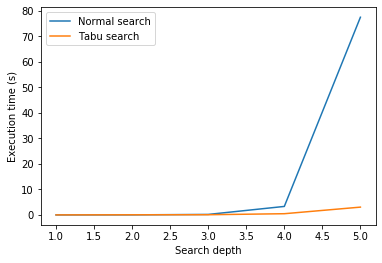

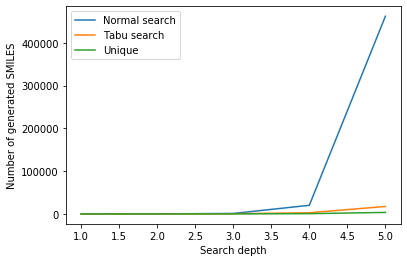

In [7]:
plot_times(time_normal, time_tabu, figures_prefix+"times.png")
plot_n_smiles(n_smiles_normal, n_smiles_tabu, n_unique_smiles, figures_prefix+"n_smiles.png")